<a href="https://colab.research.google.com/github/sagunkayastha/ILab_Tutorials/blob/master/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise One

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model

**Helper Functions**

In [0]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def plot_decision_boundary(model, X, y):
  # Set min and max values and give it some padding
  x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
  y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole grid
  Z = model(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.ylabel('x2')
  plt.xlabel('x1')
  plt.scatter(X[0, :], X[1, :], c=y.squeeze(), cmap=plt.cm.Spectral)

def sigmoid(x):

  s = 1/(1+np.exp(-x))
  return s

**Data Preprocessing and visualization**

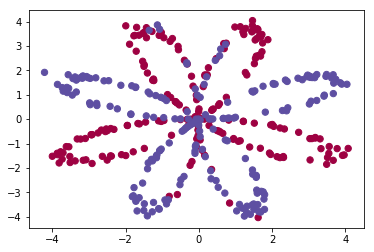

In [0]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y.squeeze(), s=40, cmap=plt.cm.Spectral);

Data

In [0]:
# Shape of input data
shape_X = None
shape_Y = None 
m = None
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

**Solving Problem with Simple logistic regression - scikit learn library**

In [0]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


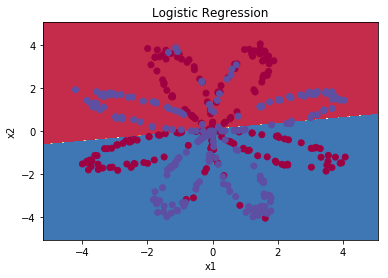

In [0]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# MLP


For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$




![alt text](https://raw.githubusercontent.com/sagunkayastha/ILab_Tutorials/master/mlp.png)

In [0]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = None # size of input layer
    n_h = None
    n_y = None # size of output layer
    
    return (n_x, n_h, n_y)

**Initialize the weights and biases**

hint: Initialize weights and biases

      use - np.random.randn(a, b) * 0.01 for weights
          - np.zeros(shape=(a, 1)) for biases 

In [0]:
def initialize_parameters(n_x, n_h, n_y):
    
    
    np.random.seed(2) 
        
    W1 = None
    b1 = None
    W2 = None
    b2 = None
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

**Forward Propagation**

Steps:
1. Get the values of weights and biases for parameter dictionary 
2. Perform forward propagation for figure above. Use tanh activation function for first hidden layer and sigmoid for output layer
3. Return Activation from output layer and a dictionary with all the activations 


In [0]:
def forward_propagation(X, parameters):
    
    ### Start ###
    W1 = None
    b1 = None
    W2 = None
    b2 = None
    ### End 1 ###
    
    ### Start 2 ###
    Z1 = None
    A1 = None
    Z2 = None
    A2 = None
    
    ### End 2 ###
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

**Compute Cost**

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

use following code to calculate cross entropy loss 

-> logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))

-> cost = - np.sum(logprobs) / m  


In [0]:

def compute_cost(A2, Y, parameters):
   
    m = None # number of example
    
    
    W1 = None
    W2 = None
    
    
    logprobs = None
    cost = None
    
    
    cost = np.squeeze(cost)     # turns [[17]] into 17  
                          
    
    
    return cost

**Back Propagation**

![alt text](https://raw.githubusercontent.com/sagunkayastha/ILab_Tutorials/master/grad.png)

Perform Backward Propagation for the network

Since we used Tanh function as activation function for first hidden layer, use $g^{[1]'}(z) = 1-a^2$ as derivative of tanh

(1 - np.power(A1, 2)).

In [0]:
def backward_propagation(parameters, cache, X, Y):
    
   
    m = X.shape[1]
    
    ## Retrive W1, W2, A1 and A2 from parameters and cache
    ### Start ###
    W1 = None
    W2 = None
        
    A1 =  None
    A2 =  None
    ### End ###
   
  
    ### Start Backpropagation ###
    dZ2= None
    dW2 = None
    db2 = None
    
    
    dZ1 = None
    dW1 = None
    db1 = None
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

**Update the parameters with gradients from backpropagation**
- W1 = W1 - learning_rate * dW1

In [0]:
def update_parameters(parameters, grads, learning_rate=0.001):
   
    ## Retrive W1, W2, b1,b2 from parameters 
    W1 = None
    b1 = None
    W2 = None
    b2 = None
    ### End ### 
  
    ## Retrive dW1, dW2, db1,db2 from parameters
    dW1 = None
    db1 = None
    dW2 = None
    db2 = None
    ### End ###
    
    ## Update ##
    W1 = None
    b1 = None
    W2 = None
    b2 = None
   
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

**Combine all the functions and build your neural network**

In [0]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    
    # Initialize parameters
    parameters = None
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = None
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = None
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = None
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = None
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))


In [0]:
parameters = nn_model(X, Y, 6, num_iterations=10000, print_cost=True)

In [0]:
def predict(parameters, X):
   
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    
    return predictions

**Try making models with different n_h values**

Cost after iteration 0: 0.693278
Cost after iteration 1000: 0.279603
Cost after iteration 2000: 0.207597
Cost after iteration 3000: 0.186094
Cost after iteration 4000: 0.176801
Cost after iteration 5000: 0.176758
Cost after iteration 6000: 0.172768
Cost after iteration 7000: 0.169508
Cost after iteration 8000: 0.166951
Cost after iteration 9000: 0.164961


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

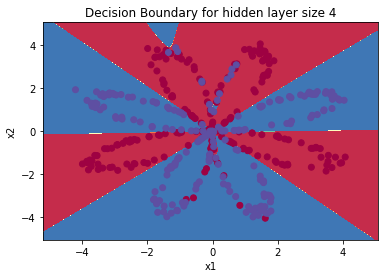

In [0]:
n_h_t = 5
parameters = nn_model(X, Y, n_h  = n_h_t, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h_t))

In [0]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


# Exercise Two

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [0]:

!wget https://github.com/sagunkayastha/ILab_Tutorials/raw/master/test_catvnoncat.h5
!wget https://github.com/sagunkayastha/ILab_Tutorials/raw/master/train_catvnoncat.h5
  
# helper function to import data
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes



In [0]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


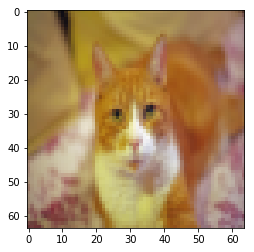

In [0]:
# Example
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [0]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [0]:
parameters = nn_model(train_set_x, train_set_y, n_h = 60, num_iterations=5000, print_cost=True)

# Using Keras Deep Learning Framework 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(60, input_dim=train_set_x_flatten.shape[0], activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
model.fit(train_set_x.T, train_set_y.T, epochs=150, batch_size=8)